In [4]:
# import useful libraries first
import os
import math
import numpy as np
from scipy import stats
from collections import Counter
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

# define the file path for the text file of interest - yours will be different
fpath = "data/hw2/"
fname = "wnat.txt"  # text file with adam smiths the wealth of nations

# open the text file and start reading the lines in
f = open(os.path.join(fpath,fname),'r')

# Since we want to get transitions we should take this time to get rid of extraneous data.
# how to show what we have in the dictionary


chars = []
for line in f:
    # i want to make all of the letters lowercase for funsies, also less characters to mess with
    lowers = [unicode(a.lower(),errors='ignore') for a in line ]
    # extend method adds all of this to a single list list
    chars.extend(lowers)
    
print(chars)
# now that I have all of the data in file I can close it 
f.close() # its just good form to close the file after use






IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
# Now that we have all of the data it is a good idea to get a running count of everything. 
# we could take some time to wirte a ton of code for this, or we can just use the counter method
char_counts = Counter(chars)
        
# so one thing is that since there is a lot of new line and space characters, it will skew our model so 
# lets weight them so that they appear to occur less
#char_counts['\n'] = int(round(char_counts['\n']/2))
#char_counts[' '] = int(round(char_counts[' ']/100))

# how to show what we have in the dictionary
print(char_counts.keys().index('a'))
for k,v in char_counts.iteritems():
    print(k,v)


27
(u'', 3500)
(u'\n', 46197)
(u'!', 8)
(u' ', 362289)
(u'&', 6)
(u')', 99)
(u'(', 91)
(u'-', 1149)
(u',', 30130)
(u'/', 4)
(u'.', 16384)
(u'1', 4639)
(u'0', 1702)
(u'3', 2192)
(u'2', 2438)
(u'5', 1921)
(u'4', 2103)
(u'7', 1975)
(u'6', 2047)
(u'9', 1511)
(u'8', 1662)
(u';', 1953)
(u':', 165)
(u'?', 27)
(u'@', 2)
(u'[', 2142)
(u']', 2142)
(u'a', 136393)
(u'c', 58562)
(u'b', 28283)
(u'e', 232349)
(u'd', 62097)
(u'g', 28938)
(u'f', 50459)
(u'i', 121922)
(u'h', 104038)
(u'k', 6207)
(u'j', 1314)
(u'm', 46405)
(u'l', 63651)
(u'o', 146503)
(u'n', 126908)
(u'q', 3240)
(u'p', 42194)
(u's', 105010)
(u'r', 117739)
(u'u', 53402)
(u't', 178913)
(u'w', 28853)
(u'v', 19599)
(u'y', 33792)
(u'x', 5416)
(u'z', 316)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52]


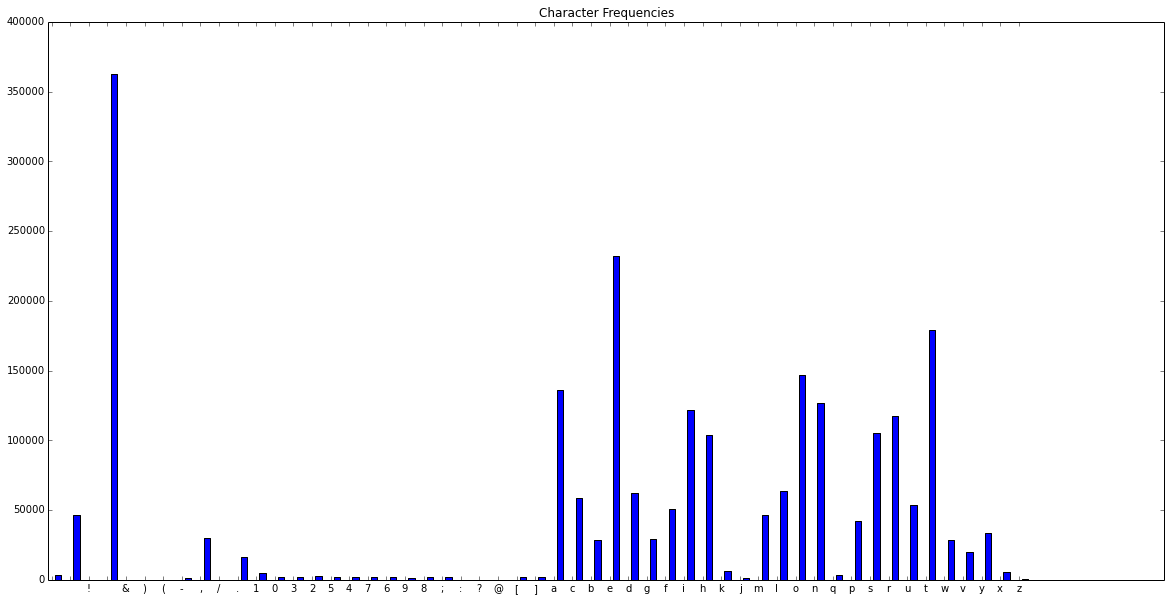

In [6]:

# so we want a histogram of all the frequencies of the characters. What is a histogram but a fancy barplot. 
# we will use the bar plot method here because histogram has you define bins, so it works better for numeric data. 
# we could change all the characters to ascii numbers then do a histogram that way, but since the concept of a bin implies
# character overlap, we dont want to do that. Hence bar plot

x= np.arange(len(char_counts))
print(x) # show the numpy array we made
width = 0.35

# make a bar plot
fig,ax = plt.subplots(figsize=(20,10))

ax.bar(x + width,char_counts.values(), width)
ax.set_xticks(x + width/2)
ax.set_xticklabels(tuple(char_counts.keys()))
ax.set_title('Character Frequencies')
plt.show()


In [7]:
# now we need to do the same for the transitions. To get this we can either count the number of occurences of every possible
# character transition, or just the ones that appear in this text. Lets go with just the ones that appear in the text.
# although if you want you can do permutaions of pairs of characters in the set that matches our dictionary keys. 

# so we make a list of pairs of data
ch_pairs = [chars[i]+chars[i+1] for i in range(len(chars)-1)]
#print(ch_pairs)

#get the frequencies of each transition
ch_pairs_counts = Counter(ch_pairs)
print(len(ch_pairs_counts))
for k,v in sorted(ch_pairs_counts.iteritems()):
    print(k,v)



1139
(u'', 2323)
(u'\n', 1496)
(u'\n\n', 9356)
(u'\n(', 3)
(u'\n.', 126)
(u'\n0', 112)
(u'\n1', 1969)
(u'\n2', 467)
(u'\n3', 309)
(u'\n4', 345)
(u'\n5', 270)
(u'\n6', 313)
(u'\n7', 185)
(u'\n8', 246)
(u'\n9', 164)
(u'\n[', 2067)
(u'\na', 3380)
(u'\nb', 1303)
(u'\nc', 1446)
(u'\nd', 644)
(u'\ne', 963)
(u'\nf', 896)
(u'\ng', 1471)
(u'\nh', 779)
(u'\ni', 2072)
(u'\nj', 45)
(u'\nk', 78)
(u'\nl', 517)
(u'\nm', 1106)
(u'\nn', 554)
(u'\no', 2204)
(u'\np', 1408)
(u'\nq', 113)
(u'\nr', 545)
(u'\ns', 1607)
(u'\nt', 6087)
(u'\nu', 336)
(u'\nv', 213)
(u'\nw', 1626)
(u'\nx', 5)
(u'\ny', 104)
(u'\nz', 1)
(u' ', 174)
(u'  ', 1)
(u' &', 6)
(u' (', 88)
(u' ,', 15)
(u' .', 1181)
(u' 0', 38)
(u' 1', 1165)
(u' 2', 462)
(u' 3', 370)
(u' 4', 235)
(u' 5', 150)
(u' 6', 114)
(u' 7', 75)
(u' 8', 80)
(u' 9', 54)
(u' ;', 1)
(u' [', 74)
(u' ]', 1457)
(u' a', 37187)
(u' b', 16779)
(u' c', 18138)
(u' d', 7997)
(u' e', 12028)
(u' f', 11623)
(u' g', 7092)
(u' h', 10666)
(u' i', 27181)
(u' j', 530)
(u' k', 904)
(u' l',

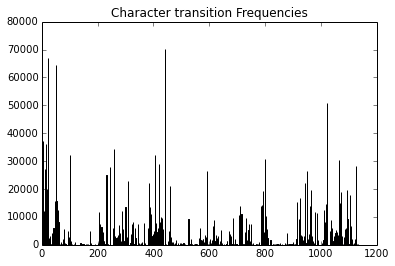

In [16]:
x2= np.arange(len(ch_pairs_counts))
#print(x2) # show the numpy array we made
width = 0.35

# make a bar plot
fig2,ax2 = plt.subplots()

ax2.bar(x2 + width,ch_pairs_counts.values(), width)
#ax2.set_xticks(x2 + width/2)
#ax2.set_xticklabels(tuple(ch_pairs_counts.keys()))
ax2.set_title('Character transition Frequencies')
plt.show()

# so there are 862 of these, you are going to want to play with the rectangle widths and tick marks


In [17]:
# so now we need to create a markov chain. well the probability that a given transition occurs is the number of transitions 
# observed in each case divided by the total number of observations.
obs   = sum(ch_pairs_counts.values())
probs = [[k,v/obs] for k,v in ch_pairs_counts.iteritems()]
print(probs)

# check to see if it sums to one
print(sum([c[1] for c in probs]))


[[u'', 0.001013976551519437], [u' c', 0.00791713589817458], [u'gu', 0.0003077285703061572], [u' a', 0.01623191821840435], [u' f', 0.005073374713004915], [u' g', 0.0030956184689521515], [u' d', 0.003490645924451545], [u' e', 0.005250154955521218], [u' j', 0.00023134204576207563], [u' k', 0.0003945909610734271], [u' h', 0.0046556495473552804], [u' i', 0.01186435499218675], [u' n', 0.003634252590594418], [u' o', 0.015708124907244936], [u' l', 0.0032147814472409187], [u' m', 0.0060646535543741106], [u' r', 0.003304262804563986], [u' s', 0.008670525277392208], [u' p', 0.008107883962321802], [u':/', 8.729888519323609e-07], [u' v', 0.001202542143536827], [u' w', 0.008286410182541969], [u' t', 0.029256038900383242], [u' u', 0.0017232799937144804], [u'go', 0.0009869138971095339], [u'gn', 0.0004172886712236685], [u' x', 4.801438685627984e-06], [u' y', 0.0004954211734716148], [u'gi', 0.0005290312442710107], [u'gh', 0.0014282097617613423], [u'-e', 2.7062654409903186e-05], [u' ', 7.595003011811539e

In [18]:
#  Now that we know we can generate the probabilities we want, we need to put this in a matrix format. so that we can use
# matrix math to evaluate for markov states as time passes. A way to do this is to do a nested list comp and make a grid

# we need to have a parameter map for this stuff so we know what probabilities map to what  
param_map = np.array([[ch0+ch1 for ch0 in char_counts.keys()] for ch1 in char_counts.keys()])

# for demonstration purposes the next line shows the counts and not probabilities
param_grid = np.array([[ch_pairs_counts[ch0+ch1] for ch0 in char_counts.keys()] for ch1 in char_counts.keys()])

np.set_printoptions(threshold=np.nan)
print(param_map[0,:])  # change the 0 to some other number to know what row we have
print(param_grid[0,:])
print(param_map.shape)



[u'' u'\n' u'!' u' ' u'&' u')' u'(' u'-' u',' u'/' u'.' u'1' u'0' u'3' u'2'
 u'5' u'4' u'7' u'6' u'9' u'8' u';' u':' u'?' u'@' u'[' u']' u'a' u'c' u'b'
 u'e' u'd' u'g' u'f' u'i' u'h' u'k' u'j' u'm' u'l' u'o' u'n' u'q' u'p' u's'
 u'r' u'u' u't' u'w' u'v' u'y' u'x' u'z']
[2323 1496    0  174    0    0    0    0   13    0   33    0    0    0    0
    0    0    0    1    0    0    2    0    0    0    1    1    6   14    6
    8   12   21    0    8    7    1    0    7    9    4   48    0    2  323
  103    1   16    4    2   31    0    0]
(53, 53)


In [19]:
# now  we can remake the parameter grid so that it shows probabilities instead of counts
param_grid = np.array([[ch_pairs_counts[ch0+ch1]/obs for ch0 in char_counts.keys()] for ch1 in char_counts.keys()])#
# we want to have a flat version of this so that we can create a custom probability distribution
params = np.ravel(param_grid)
pmap = np.ravel(param_map)
print('params shape: {}'.format(params.shape),'pmap shape: {}'.format(pmap.shape))
#print(params[0:5],pmap[0:5])

#create a custom probability distribution
custm = stats.rv_discrete(name='custm', values=(np.arange(len(pmap)), params))
print(custm)


#sample indices from the custom distribution 
s_inds = custm.rvs(size=(15000))
print(s_inds.max(),s_inds.min(),s_inds.shape)




('params shape: (2809,)', 'pmap shape: (2809,)')
(2733, 0, (15000,))


In [20]:
# iteratively generate characters 
new_chars = [pmap[i] for i in s_inds]
print(''.join(new_chars))

# if we want to save this to a new file
new_file = os.path.join(fpath,'out_giberish.txt')
if not os.path.isfile(new_file):
    os.mknod(new_file)
f2 = open(new_file,'w')

for item in new_chars:
        f2.write(item)
f2.close

n-r errelyndaxs uccaerm l m al iofthr  pme monhin ar
fthar t
tonoritbutoivth
p.
laopwhcks
 ie nct  pme o aerco mn llchk.d il orbeo oralr,ed s
tpaemt ore eeceanhi woye amju re r mas iseichf r
ulanncro mt h ntaninure t  cnt vs e 52on
ggia cyirvaeaanirf 
ghet,heboer psthad nd trsods n htwhthomurinofbit s 
 ultallleie. cof aonstpu shttrcont bhaoferre awh o te inunhaou vteie ajethhibluaalntd y
harelad 
p hs tt tanbeenr heivtaitome  d
aorw th hism es bgoerch mipal i t tanarr ha othonit aisd sioy se hterghtetoun trimalythnd ooreisuhe mup l mossopo4
ou. grheleofshg t
axgrfeut to  thekie hereenthreitor tleh
rar . sengcuthof f nofe e lie erfaenge thegeer wd nt
hlloie lleeffraofd, a
tatnsot cthpa lf
 e, s gemi mh micoanti6
rieawh winll es
 mthlipse  rcot ioefhe ooyo  mthetorsho 
sagm ly tongoparihe teeene s re jcoucasha

r rendstbaplveinisasluedla t94otimthonrkerovone .  iewri i g, 
32theso up wwhprr  olithucmax . c s.veo  rlf tath  ot ac

stithoccagenrsmire cromaesitolsuitalofeninerr
e n, jrugr 

<function close>